NOME COMPLETO E MATRÍCULA DOS INTEGRANTES DO GRUPO:

- LUCAS DE SOUSA BRITO, MAT:2186330019, TURMA 2021-1
- PABLO NOGUEIRA OLIVEIRA, MAT:2186330027, TURMA 2021-1
- MATHEUS BARBOSA OLIVEIRA, MAT: 2186330037, TURMA 2021-1


**INSTRUÇÕES**:

- **Mantenha a estrutura de enunciados e células de resposta apresentada neste modelo.**
- **Todas as conclusões devem estar fundamentadas com experimentos e análises de dados que corroborem os aspectos afirmados.**

## Exercício 1

No colab "2 - Inferência", no exemplo "Update Bayesiano com distribuição Beta", foi apresentado um procedimento simplificado de inferência Bayesiana para a distribuição beta. Neste update, os parâmetros $\alpha, \beta$ estão relacionados ao grau de crença sobre a hipótese. Diferentes parametrizações geram diferentes diferentes distribuições que se assemelham às gaussianas, às uniformes e, inclusive, distribuições assimétricas.

No exemplo em questão, o cenário simula a jogada de uma moeda, e, com a coleta de dados a respeito das jogadas, deseja-se tirar conclusões a respeito da moeda. Neste caso, tem-se um _a priori_ modelado por uma distribuição beta e o modelo relativo aos dados (as jogadas da moeda) é implicitamente representado por uma distribuição de Bernoulli. E, por esta razão, sabe-se que o _a posteriori_ também é conhecido, sendo também uma distribuição beta. O conceito utilizado neste caso, é o de **a priori conjugado**: certas configurações de _a priori_ e verossimilhança determinam a forma do _a posteriori_.

**Qual o impacto do _a priori_ e dos parâmetros na inferência?** Faça um estudo de caso a respeito da simluação de diferentes moedas onde o sucesso do experimento de Bernoulli representa a saída de cara na moeda. Analise diferentes valores para o _ground-truth_ $p$ da moeda, diferentes valores para o número de jogadas, e diferentes valores para $\alpha, \beta$. Explore _a prioris_ simétricos, assimétricos, com maiores ou menores magnitudes. Disserte a respeito do impacto desses parâmetros para os resultados obtidos no _a posteriori_.

In [ ]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
from scipy.stats import bernoulli


**Entendendo o A priori**

Em geral, a chances de obter cara em uma jogada de moeda é de 50%. Mas existem moedas que não são justas (podem ter as 2 faces iguais, ou estarem com peso desbalanceado para um dos lados) Neste caso a probabilidade pode mudar pois a moeda está enviesada. No seguinte experimento será simulado o grau de confiança adquirida a medida que se lança as moedas. A moeda é justa, mas não sabemos. Então de antemão não podemos dizer nada sobre a moeda. Mas a medida que vamos jogando a moeda percemos que ela vai se mantendo equilibrada proximo de 50% para cada lado. E a medida que continuamos mais confiantes estamos nessa crença: **A moeda é justa** p = 0,5

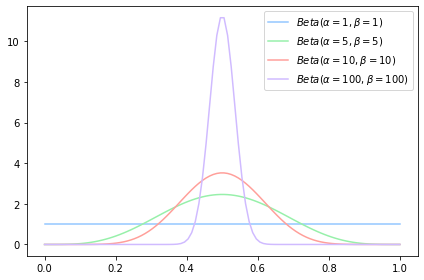

In [ ]:
a1, b1 = 1, 1
rv1 = beta(a1, b1)

a2, b2 = 5, 5
rv2 = beta(a2, b2)

a3, b3 = 10, 10
rv3 = beta(a3, b3)

a4, b4 = 100, 100
rv4 = beta(a4, b4)

x = np.linspace(0, 1, 100)
plt.plot(x, rv1.pdf(x), label=r'$Beta(\alpha = '+str(a1)+r',\beta = '+str(b1)+r')$')
plt.plot(x, rv2.pdf(x), label=r'$Beta(\alpha = '+str(a2)+r',\beta = '+str(b2)+r')$')
plt.plot(x, rv3.pdf(x), label=r'$Beta(\alpha = '+str(a3)+r',\beta = '+str(b3)+r')$')
plt.plot(x, rv4.pdf(x), label=r'$Beta(\alpha = '+str(a4)+r',\beta = '+str(b4)+r')$')

plt.legend()
plt.tight_layout()
plt.show()


No exemplo acima notamos que a curva fica mais achatada na base a medida que minha confiança aumenta de que a **moeda é justa**. Em outras palavras, a probabilidade tende a ficar em torno de 0.5 (seria a média da gaussiana).

Neste ensaio temos um "**A priori**" (isto é o que acreditamos sobre a moeda) de que a moeda é justa e isso vai se confirmado a medida que mais e mais jogadas são feitas.

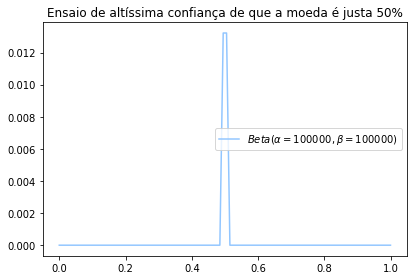

In [ ]:
a1, b1 = 100000, 100000
rv1 = beta(a1, b1)

x = np.linspace(0, 1, 100)
plt.plot(x, rv1.pdf(x), label=r'$Beta(\alpha = '+str(a1)+r',\beta = '+str(b1)+r')$')
plt.title("Ensaio de altíssima confiança de que a moeda é justa 50%")
plt.legend()
plt.tight_layout()
plt.show()


**Simulação com distribuição de Bernolli representando as jogadas**

A função abaixo simula o update Bayesiano e plota as informações em gráfico.


In [ ]:
def ensaio(prior_a, prior_b, p, jogadas):
    """
    Executa ensaio e plota o gráfico da simulação de lançamento de moeda.

    Parâmetros
    ----------
    prior_a int: a priori alpha
    prior_b int: a priori beta
    p float: parâmetro de Bernoulli verdadeiro
    jogadas int: número de jogadas de moeda
    """
    a = prior_a
    b = prior_b

    df = pd.DataFrame({"a": [a], "b": [b]})
    df_ = pd.DataFrame({"a": [a], "b": [b]})
    for _ in range(jogadas):
        if np.random.rand() < p:
            a, b = df.iloc[-1].values
            a += 1
            df = df.append({"a": a, "b": b}, ignore_index=True)

            a, b = df_.iloc[-1].values
            b += 1
            df_ = df_.append({"a": a, "b": b}, ignore_index=True)
        else:
            a, b = df.iloc[-1].values
            b += 1
            df = df.append({"a": a, "b": b}, ignore_index=True)

            a, b = df_.iloc[-1].values
            a += 1
            df_ = df_.append({"a": a, "b": b}, ignore_index=True)



    x = np.linspace(0, 1, jogadas)
    fig, ax = plt.subplots(figsize=(12,4))

    # Aqui é plotado o a priori (nossa crença inicial)
    rv_prior = beta(prior_a, prior_b)
    prob_prior = prior_a / (prior_a + prior_b) 
    ax.plot(x, rv_prior.pdf(x), alpha=0.5, label="A priori p=%.3f, Beta(\u03B1=%i, \u03B2=%i)"%(prob_prior, prior_a, prior_b))

    # Aqui é plotado a probabilidade de sair cara
    a1, b1 = df.iloc[-1].values
    rv_cara= beta(a1, b1)
    prob_cara = a1 / (a1 + b1) 
    ax.plot(x, rv_cara.pdf(x), color='orange', alpha=1, label="Cara p=%.3f, Beta(\u03B1=%i, \u03B2=%i)"%(prob_cara, a1, b1))

    # Aqui é plotado a probabilidade de sair coroa
    a2, b2 = df_.iloc[-1].values
    rv_coroa= beta(a2, b2)
    prob_coroa = a2 / (a2 + b2) 
    ax.plot(x, rv_coroa.pdf(x), color='green', alpha=1, label="Coroa p=%.3f, Beta(\u03B1=%i, \u03B2=%i)"%(prob_coroa, a1, b1))


    ax.vlines(p, 0, rv_cara.pdf(prob_cara), color='orange', alpha=.5, linestyles='--',)
    ax.vlines(1-p, 0, rv_coroa.pdf(prob_coroa), color='green', alpha=.5, linestyles='--',)

    plt.legend()
    plt.tight_layout()
    plt.show()


**Enasio 1 - A priori não conhecido**

Não sabemos nada sobre a moeda. Mas a verdade é que a moeda de fato tem um vies de 20% para cara.
$a = 1, b = 1, p = 0.2$

**Comportamento**: Neste caso a distribuição aproxima bem da média 0.2 cara e 0.8 coroa. A crença não influencia o resultado.

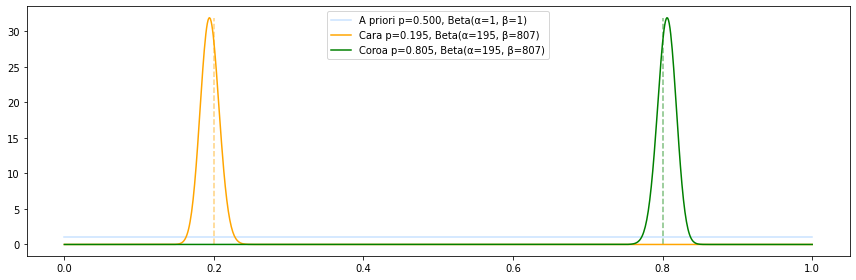

In [ ]:
a = 1
b = 1
p = .2
jogadas = 1000
ensaio(a,b,p,jogadas)

**Enasio 2 - A priori simétrico com alta confiança**

Acreditamos que a moeda é justa com muita confiança. Mas a verdade é que a moeda de fato tem um vies de 20% para cara.  $a=500,b=500,p=0.2$

**Comportamento:** Neste caso a crença (a priori) de que a moeda é justa influencia o comportamento das jogadas das moedas nao permitindo que elas convirjam para a média esperada 0.2 e 0.8 respectivamente.

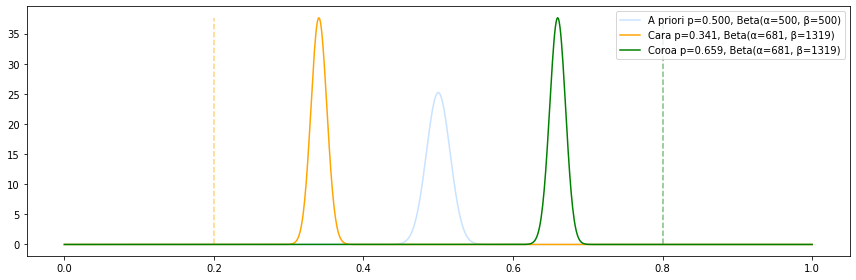

In [ ]:
a = 500
b = 500
p = .2
jogadas = 1000
ensaio(a,b,p,jogadas)

**Enasio 3 - A priori simétrico com baixa confiança**

Acreditamos que a moeda é justa com baixa confiança (amplitude). Mas a verdade é que a moeda de fato tem um vies de 20% para cara.  $a=10,b=10,p=0.2$ 

**Comportamento:** Neste caso a crença (a priori) de que a moeda é justa influencia pouco o comportamento das jogadas das moedas. 

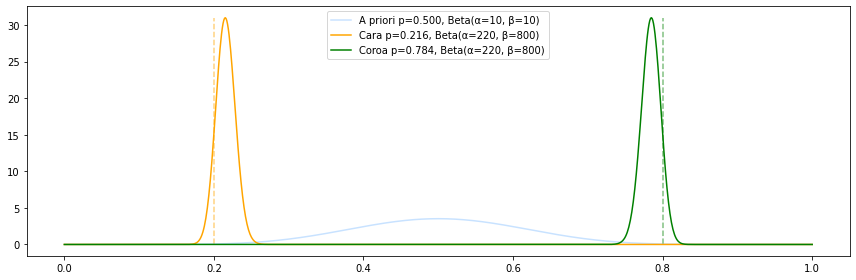

In [ ]:
a = 10
b = 10
p = .2
jogadas = 1000
ensaio(a,b,p,jogadas)

**Enasio 4 - A priori assimétrico com alta confiança**

Acreditamos que a moeda é não é justa com alta confiança (amplitude) Acreditamos que a moeda tem vies de 30% para cara. Mas a verdade é que a moeda de fato tem um vies de 20% para cara.  $a=30,b=70,p=0.2$ 

**Comportamento:** Neste caso o apriori influencia ambas as probabilidades atraindo para si. Para a probabilidade de ser coroa o a priori não deixa que se aproxime da média esperada de 0.8 e para a cara vemos a média um pouco elevada tendendo a chegar perto de 0.3 que é a crença atual.  

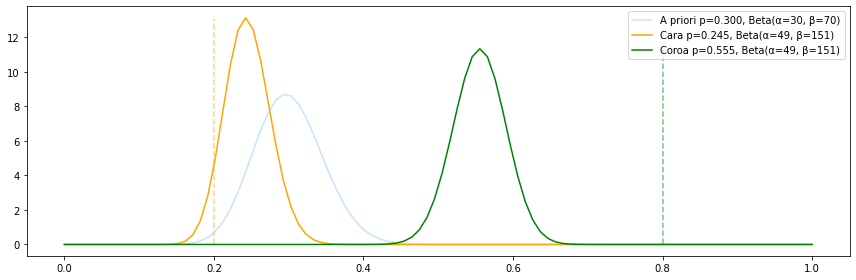

In [ ]:
a = 30
b = 70
p = .2
jogadas = 100
ensaio(a,b,p,jogadas)

**Conclusões**

Pela execução ensaios acima, podemos chegar à conclusão de que o **a priori** (crença) influencia as probabilidades das jogadas da moeda. Se não se sabe (ou crê) nada sobre a moeda a principio, neste caso as jogadas seguem a probabilidade esperada para as condições da moeda. 

Também é possível concluir que quanto maior a confiança ou amplitude do **a priori**, maior será a sua capacidade de influenciar o resultado final.

## Exercício 2


No colab "2 - Inferência", no tópico "Exemplo da altura dos programdores Python" foi apresentada uma modelagem para inferência que usava de referência a altura média da população do planeta como _a priori_ para a inferência da média do _a posteriori_. Pra a inferência da variância da distribuição, foi utilizado um _a priori_ não informado.

Implemente um cenário semelhante, onde a amostra de alturas coletadas seja dada por uma Gaussiana de média 180 e variância 9. O tamanho da amostra deve ser a altura de 100 programadores. Faça uma inferência em grid da média e variância do _a posteriori_ considerando tanto _a priori_'s desinformados para média e variância, quanto _a priori_'s a partir das informações prévias de média e variância da altura das pessoas do planeta. **Analise as diferenças entre os _a posteriori_ obitos**.

In [ ]:
import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
import pandas as pd
import seaborn

In [ ]:
# Amostra: Altura de 100 programadores

X = np.random.randint(150, 200, 100)
X

array([163, 171, 183, 152, 185, 151, 191, 180, 184, 185, 181, 153, 167,
       154, 193, 181, 192, 174, 154, 174, 190, 158, 190, 188, 171, 198,
       151, 151, 191, 190, 198, 187, 196, 193, 153, 185, 170, 161, 173,
       198, 181, 151, 162, 166, 160, 157, 172, 157, 181, 163, 168, 190,
       193, 164, 184, 165, 182, 191, 180, 151, 152, 170, 188, 159, 185,
       151, 188, 182, 189, 161, 151, 151, 178, 192, 180, 190, 195, 183,
       181, 163, 156, 198, 193, 166, 162, 183, 193, 168, 174, 197, 159,
       162, 170, 163, 155, 177, 180, 175, 182, 183])

**A priori**

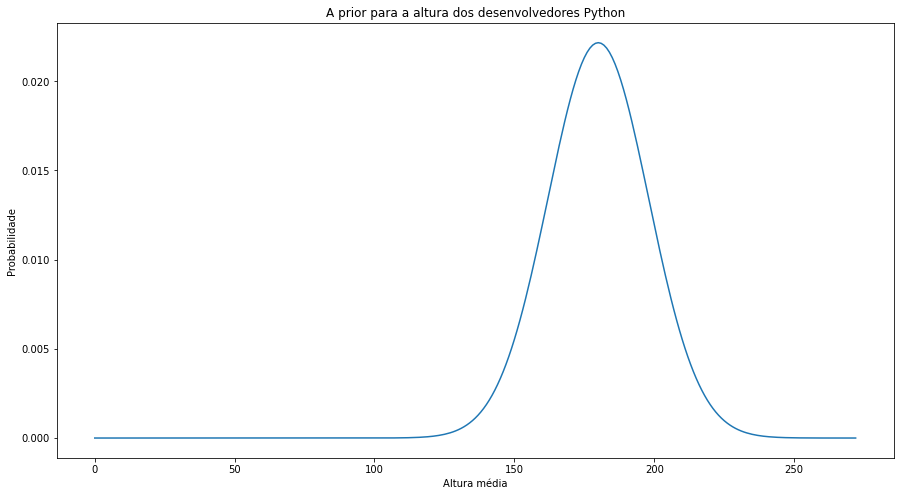

In [ ]:
mean_height_prog = 180
deviation_height_prog = 9

mean_height_sample = np.linspace(0, 272, 273)
sample_probabilitu = scipy.stats.norm.pdf(mean_height_sample, mean_height_prog, deviation_height_prog * 2)

plt.figure(figsize=(15, 8))
plt.plot(mean_height_sample, sample_probabilitu)
plt.xlabel('Altura média')
plt.ylabel('Probabilidade')
plt.title('A prior para a altura dos desenvolvedores Python');

A principio a probilidade da altura dos desenvolvedores está mais deslocado e acrescenta um valor maior considerado próximo dos 200cm.

**Inferência Bayesiana em Grid**



*   Média desinformada.
*   Encontrar qual o melhor parâmetro de média com a variância de 9.



A média de altura mais provável: 173.27


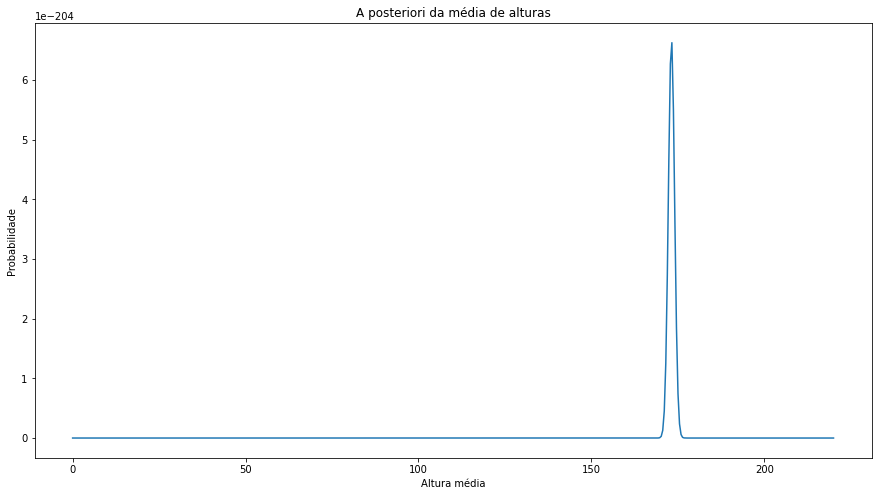

In [ ]:
mean_height_prog = 180
deviation_height_prog = 9
candidatos_media = np.linspace(0., 220, 500)
sigma = 9.

def posterior(med, sig, x):
    prior_med = scipy.stats.norm.logpdf(med, mean_height_prog, deviation_height_prog * 2)
    return prior_med + scipy.stats.norm.logpdf(x, med, sig).sum()


def compute_posteriors(candidatos_media, sigma, x):
    for med in candidatos_media:
        yield posterior(med, sigma, x)
        

posteriores = list(compute_posteriors(candidatos_media, sigma, X))

print('A média de altura mais provável: %.2f' % candidatos_media[np.argmax(posteriores)])


plt.figure(figsize=(15, 8))
plt.plot(candidatos_media, np.exp(posteriores))
plt.xlabel('Altura média')
plt.ylabel('Probabilidade')
plt.title('A posteriori da média de alturas');



*   Variância desinformada
*   Média assumida de 173 cms



O desvio padrão mais provável para as alturas: 15.70


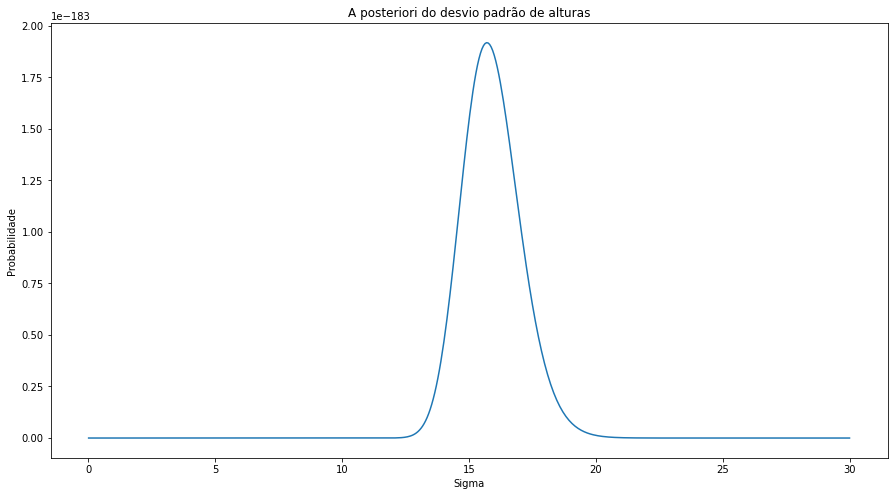

In [ ]:
sigma_min = .01
sigma_max = 30.
candidatos_sigma = np.linspace(sigma_min, sigma_max, 500)
med = 173.

def posterior(med, sigma, x):
    sigma_prior = scipy.stats.uniform.logpdf(sigma, sigma_min, sigma_max)
    return sigma_prior + scipy.stats.norm.logpdf(x, med, sigma).sum()

def compute_posteriors(med, candidatos_sigma, x):
    for sigma in candidatos_sigma:
        yield posterior(med, sigma, x)

posteriores = list(compute_posteriors(med, candidatos_sigma, X))

print('O desvio padrão mais provável para as alturas: %.2f' % candidatos_sigma[np.argmax(posteriores)])

plt.figure(figsize=(15, 8))
plt.plot(candidatos_sigma, np.exp(posteriores))
plt.xlabel('Sigma')
plt.ylabel('Probabilidade')
plt.title('A posteriori do desvio padrão de alturas');

Conforme as inferências anteriores, apontam que a altura sendo modelada com distribuição normal com média de 173cm e desvio padrão de 15cms

**Combinações de todos os parâmetros**

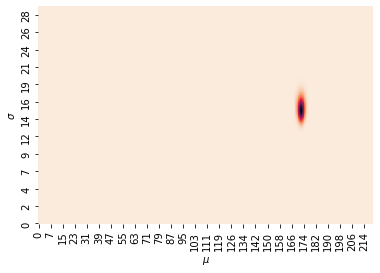

In [ ]:
mean_height_prog = 180
deviation_height_prog = 9

sigma_min = .01
sigma_max = 30.
candidatos_sigma = np.linspace(sigma_min, sigma_max, 500)
candidatos_media = np.linspace(0., 220, 500)


def posterior(med, sigma, x):
    prior_med = scipy.stats.norm.logpdf(med, mean_height_prog, deviation_height_prog * 2)
    sigma_prior = scipy.stats.uniform.logpdf(sigma, sigma_min, sigma_max)
    return prior_med + sigma_prior + scipy.stats.norm.logpdf(x, med, sigma).sum()

def compute_posteriors(candidatos_media, candidatos_sigma, x):
    for med in candidatos_media:
        for sigma in candidatos_sigma:
            yield med, sigma, posterior(med, sigma, x)
            

resultados = list(compute_posteriors(candidatos_media, candidatos_sigma, X))
resultados = pd.DataFrame(resultados, columns=('med', 'sigma', 'posterior')).set_index(['med', 'sigma'])['posterior']

heatmap_results = -np.exp(resultados.unstack(-1))
heatmap_results.index = heatmap_results.index.astype(int)
heatmap_results = heatmap_results.T
heatmap_results.index = heatmap_results.index.astype(int)

ax = seaborn.heatmap(heatmap_results,
                     xticklabels=18,
                     yticklabels=40,
                     cbar=False)
plt.xlabel('$\mu$')
plt.ylabel('$\sigma$')
ax.invert_yaxis()



*   A média mais provável sobre a combinação dos parâmetros é de 173cms
*   E o desvio padrão mais provável é de 14cms



**Média e Variância da altura das pessoas do planeta**

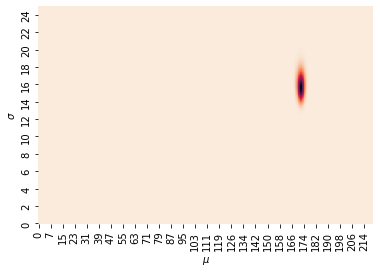

In [ ]:
mean_height_prog = 165
deviation_height_prog = 7

sigma_min = .01
sigma_max = 25.
candidatos_sigma = np.linspace(sigma_min, sigma_max, 500)
candidatos_media = np.linspace(0., 220, 500)


def posterior(med, sigma, x):
    prior_med = scipy.stats.norm.logpdf(med, mean_height_prog, deviation_height_prog * 2)
    sigma_prior = scipy.stats.uniform.logpdf(sigma, sigma_min, sigma_max)
    return prior_med + sigma_prior + scipy.stats.norm.logpdf(x, med, sigma).sum()

def compute_posteriors(candidatos_media, candidatos_sigma, x):
    for med in candidatos_media:
        for sigma in candidatos_sigma:
            yield med, sigma, posterior(med, sigma, x)
            

resultados = list(compute_posteriors(candidatos_media, candidatos_sigma, X))
resultados = pd.DataFrame(resultados, columns=('med', 'sigma', 'posterior')).set_index(['med', 'sigma'])['posterior']

heatmap_results = -np.exp(resultados.unstack(-1))
heatmap_results.index = heatmap_results.index.astype(int)
heatmap_results = heatmap_results.T
heatmap_results.index = heatmap_results.index.astype(int)

ax = seaborn.heatmap(heatmap_results,
                     xticklabels=18,
                     yticklabels=40,
                     cbar=False)
plt.xlabel('$\mu$')
plt.ylabel('$\sigma$')
ax.invert_yaxis()

Já com a média e variância das pessoas do planeta (165 e 7)

* A média mais provável sobre a combinação dos parâmetros é de 174cms
* E o desvio padrão mais provável é de 16cms

## Exercício 3

Implemente um modelo de VAE Gaussiano para uma base de escolha do grupo, que seja diferente da apresentada na sala de aula. Treine este modelo em um latente de tamanho arbitrário (de dimensionalidade 3 ou maior). Exiba as propriedades do modelo treinado para geração de amostras com a combinação das principais características atreladas aos agrupamentos do espaço latente. 

Para tal, utilize o procedimento de encontrar os vetores de média dos dois tipos de dados sobre os quais deseja-se gerar a amostra combinada e gere o vetor apropriado para o decoder que represente combinações das características em questão.

Exiba alguns exemplos gerados a partir das combinações escolhidas.

Espaço Latente 3D: 
* https://colab.research.google.com/drive/1RekzHEJbMWyNGgj9ta8I2pQgaJelzXzd?usp=sharing

Espaço Latente 2D (para efeito de comparação): 
* https://colab.research.google.com/drive/17oBMNeQQ_uB0LTVkMyaXAT5CJMXHKeb2?usp=sharing

A base Fashion Mnist trás imagens como tenis, sandalias, camisetas, vestidos, casacos e outros itens normalmente encontrados em catálogos de lojas de vestuário.

Tal conjunto de dados é interessante pois muitos itens ficam na fronteira entre duas ou mais classes, por exemplo:

vestidos curtos parecem camisetas;
camisetas cumpridas parecem vestidos;
chinelos fechados parecem tenis;
tenis mais altos parecem botas;
agasalhos parecem camisas/camisetas.

Neste sentido o mecanismo variacional fez boas combinações entre:
* tenis, botas longas e saltos;
* camisetas, camisas, agasalhos e vestidos;

Mas como era de se esperar, algumas transições ficaram em confusas, tais como:
* sandalias para calças 
* bolsas para qualquer outra coisa. 

Um exemplo interessante de composição efetuada pelo modelo foram os macacões (intermediários entre camisetas e calças) que não existiam no conjunto original.

![Exemplo 1](https://drive.google.com/uc?id=1C943y-7et_XSfH92lhM6VUh2uzSK5zF-)

![Exemplo 2](https://drive.google.com/uc?id=1CA5qsYrhCAQ-_e7GBzsZhcCnw_Mtnm8j)






## Exercício 4

Implemente uma arquitetura de rede neural profunda Bayesiana com a biblioteca Pyro em algum dataset de escolha do grupo. Avalie a robustez da rede neural bayesiana usando a estratégia de amostragem de redes neurais apresentada em sala de aula.

Disserte a respeito do desempenho do modelo treinado em um dataset de validação atrelado ao dataset de treinamento. Avalie também o comportamento da rede neural para padrões de dados diferentes dos dados utilizados para treinamento. Desde dados levemente diferentes a dados completamente diferentes.

Neste contexto, disserte a respeito das ocasiões onde a rede neural chegou a uma classificação quando não deveria classificar o dado e vice-versa, quando a rede neural não classificou dados que deveria ser capaz de classificar. Através da estratégia de composição de distribuições para as previsões da rede neural, também considere nas avaliações diferentes limiares de incerteza para considerar que houve uma predição ou não da rede neural Bayesiana para o dado em questão.

O código fonte referente a esta resposta está disponível em 
* https://colab.research.google.com/drive/1rrqjJT4zvSYt8QfhW4hrrmhDYNSeBI76?usp=sharing

A base Fashion Mnist trás imagens como tenis, sandalias, camisetas, vestidos, casacos e outros itens normalmente encontrados em catálogos de lojas de vestuário.  

Tal conjunto de dados é interessante pois muitos itens ficam na fronteira entre duas ou mais classes, por exemplo:
* vestidos curtos parecem camisetas;
* camisetas cumpridas parecem vestidos;
* chinelos fechados parecem tenis;
* tenis mais altos parecem botas; 
* agasalhos parecem camisas/camisetas.

Em análise de amostra, identificamos que a classificação de indecisão parecem bem razoáveis pois trataram das seguintes situações: 
1. Situações de fronteira mencionadas acima;
2. imagens de qualidade ruins, baixo contraste ou mal enquadradas.

É importante ressaltar que o modelo declarou "indecisão" em apenas 11% do conjunto de dados e, do restante, 89% das predições foram corretas. Consideramos este um resultado bom pois foi usada uma rede neural simples com apenas uma camada escondida e sem convoluções.

Se os critérios da rede fossem alterados para ser menos sensíveis as indecisões a acurácia cairia bastante. Como a maior parte das indecisões representam as situações de fronteira, é razoável inferir que o modelo se concentrou nos casos evidentes para alcançar uma boa acurácia. Pode ser uma boa ideia tirar os casos evidentes do conjunto de dados e treinar um segundo modelo para criar uma rede neural capaz de identificar as classes por outras características. 

Segue alguns exemplos:

### Exemplos: Duas ou mais categorias válidas
![Exemplo 1](https://drive.google.com/uc?id=1UfP0i90CgtXG3kDu8sH8etR6k2CSicON)

### Exemplo de indecisão: Qualidade de imagem ruim
![Exemplo 2](https://drive.google.com/uc?id=1gKUSks__6inaPvFp8k9KuXl-QKlZO8c2)
![Exemplo 3](https://drive.google.com/uc?id=1wifwp9Bw3LpBCEToip9cS-tVUTX-Mj96)


